In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas 

plt.style.use( 'ggplot' )

df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )

print( df.columns )

OSError: File b'../data_sets/experimental_data/thermo_paper_data_set.csv' does not exist

In [ ]:
let = 'ACDEFGHIKLMNPQRSTVWY'
print( len( let ) )

In [ ]:
df[ 'native' ] = df.index.str[0]
df[ 'designed' ] = df.index.str[-1]

df[ 'kcat' ] = np.log10( df[ 'kcat' ] / 880 ) 
df[ 'km' ] = np.log10( df[ 'km' ] / 5.5 ) 
df[ 'kcatkm' ] = np.log10( df[ 'kcatkm' ] / 174880 ) 
df[ 'tm' ] = df[ 'tm' ] - 39.9

df.replace( [ -np.inf, np.inf ], -5, inplace=True )
df.drop( 'BglB', inplace=True )

In [ ]:
things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'purple', 0 ), 
    ( 'tm', '$T_m$', 'navy', 0 ), 
]

for sp in df.sequence_pos.unique():
    
    my_muts = df[ ( df.sequence_pos == sp ) ].copy()
    my_muts[ 'my_name' ] = my_muts.index
    my_muts.set_index( 'designed', inplace=True )
    
    plt.figure( figsize=( 13, 3 ) )
    
    for i, ( thing, fmt_str, color, native_val ) in enumerate( things ):
        
        my_native = my_muts.ix[0].my_name[0]
        plt.suptitle( '{} local sequence space'.format( str( my_muts.ix[0].my_name[:-1] ) ) )
        plt.subplot( 1, 4, i + 1 )
        plt.ylabel( fmt_str )
        plt.xlabel( 'Amino acid' )
        plt.xticks( range( 20 ), let )
        
        to_plot = []
        for letter_index, letter in enumerate( let ):
            
            if my_native == letter:
                y = 0
            elif letter in my_muts.index:
                y = my_muts.loc[ letter ][ thing ]
                if np.isnan( y ):
                    y = -5                
            else:
                y = -5 
                    
            to_plot.append( [ letter_index, y ] )
        x_vals, y_vals = zip( *to_plot )
        plt.plot( x_vals, y_vals, color=color )
    
    plt.tight_layout()
    plt.show()

In [ ]:
# sort by BLOSUM distance on X axis 

for sp in df.sequence_pos.unique():
    
    my_muts = df[ ( df.sequence_pos == sp ) ].copy()
    my_muts[ 'my_name' ] = my_muts.index
    my_muts.set_index( 'designed', inplace=True )
    
    plt.figure( figsize=( 13, 3 ) )
    
    for i, ( thing, fmt_str, color, native_val ) in enumerate( things ):
        
        my_native = my_muts.ix[0].my_name[0]
        plt.suptitle( '{} local sequence space'.format( str( my_muts.ix[0].my_name[:-1] ) ) )
        plt.subplot( 1, 4, i + 1 )
        plt.ylabel( fmt_str )
        plt.xlabel( 'BLOSUM score' )
        
        to_plot = []
        for letter_index, letter in enumerate( let ):
            
            blo = MatrixInfo.blosum62
            key = ( my_native, letter )
            if not key in blo:
                key = key[::-1]
            x = blo[ key ]
            
            if my_native == letter:
                y = 0
            elif letter in my_muts.index:
                y = my_muts.loc[ letter ][ thing ]
                if np.isnan( y ):
                    y = -5                
            else:
                y = np.nan
                    
            to_plot.append( [ x, y ] )
        x_vals, y_vals = zip( *to_plot )
        plt.scatter( x_vals, y_vals, color=color )
    
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
for ( thing, fmt_str, color, native_val ) in things: 
    data_3d = []
    for sp in df.sequence_pos.unique(): 
        my_muts = df[ ( df.sequence_pos == sp ) ].copy()
        my_muts[ 'my_name' ] = my_muts.index
        my_muts.set_index( 'designed', inplace=True )
        for L_index, L in enumerate( let ):
            x = L_index
            if my_muts.ix[ 0 ].my_name[ 0 ] == L:
                y = 0
            elif L in my_muts.index:
                y = my_muts.loc[ L ][ thing ]
                if np.isnan( y ):
                    y = -5
            else:
                y = -5             
            data_3d.append( [ x, y, sp ] )

    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x_vals, y_vals, z_vals = zip( *data_3d )

    ax.set_xlabel( 'Sequence position along BglB sequence' )
    ax.set_xlim3d( 0, 450 )
    ax.set_ylabel( 'Amino acid residue' )
    ax.set_ylim3d( 0, 20 )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    ax.set_zlim3d( -5, 1 )
    ax.set_yticks( range( 20 ), let )
    ax.scatter( z_vals, x_vals, y_vals, color=color ) 
    fig.show()

In [10]:
blo = pandas.read_csv( 'blosum62.txt', index_col=0, sep='\s+' )
print( blo )

print( blo.loc[ 'A' ][ 'G' ] )

   A  R  N  D  C  Q  E  G  H  I ...  P  S  T   W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 ... -1  1  0  -3 -2  0 -2 -1  0 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 ... -2 -1 -1  -3 -2 -3 -1  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 ... -2  1  0  -4 -2 -3  3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 ... -1  0 -1  -4 -3 -3  4  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 ... -3 -1 -1  -2 -2 -1 -3 -3 -2 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 ... -1  0 -1  -2 -1 -2  0  3 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 ... -1  0 -1  -3 -2 -2  1  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 ... -2  0 -2  -2 -3 -3 -1 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 ... -2 -1 -2  -2  2 -3  0  0 -1 -4
I -1 -3 -3 -3 -1 -3 -3 -4 -3  4 ... -3 -2 -1  -3 -1  3 -3 -3 -1 -4
L -1 -2 -3 -4 -1 -2 -3 -4 -3  2 ... -3 -2 -1  -2 -1  1 -4 -3 -1 -4
K -1  2  0 -1 -3  1  1 -2 -1 -3 ... -1  0 -1  -3 -2 -2  0  1 -1 -4
M -1 -1 -2 -3 -1  0 -2 -3 -2  1 ... -2 -1 -1  -1 -1  1 -3 -1 -1 -4
F -2 -3 -3 -3 -2 -3 -3 -3 -1  0 ... -4 -2 -2   1  3 -1 -3 -3 -

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


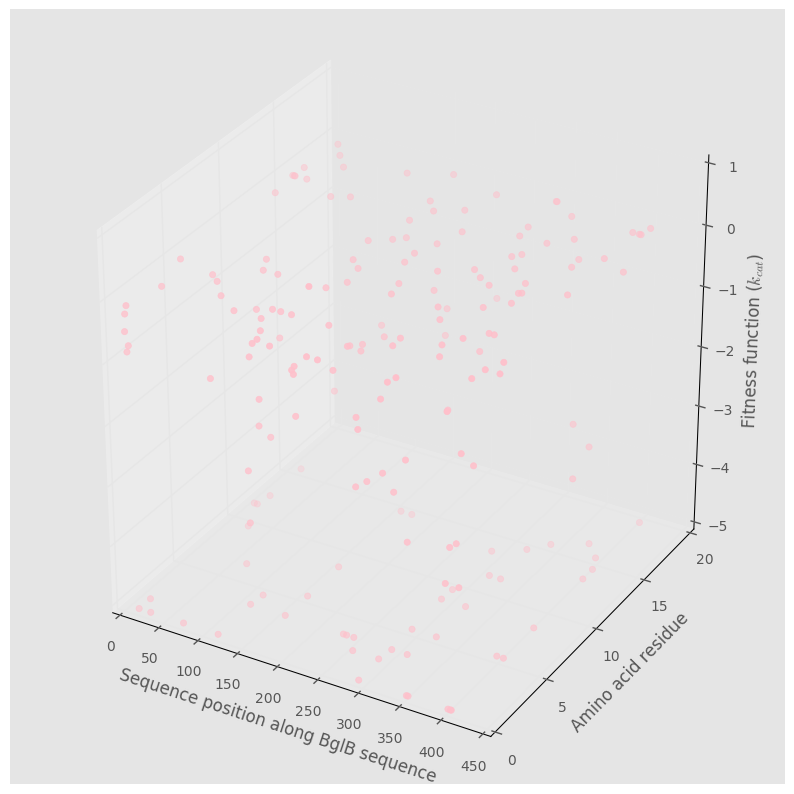

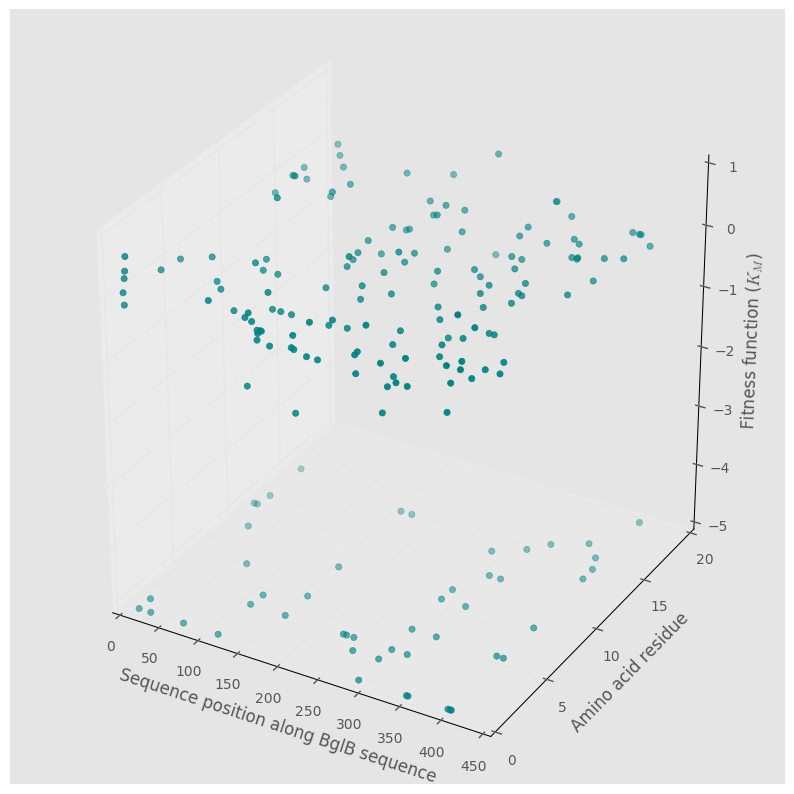

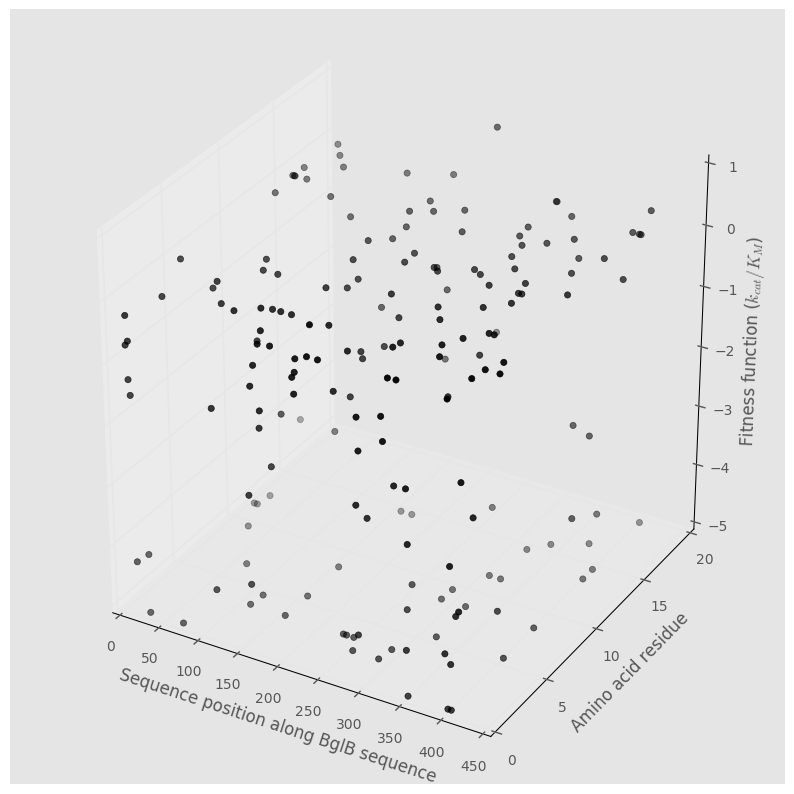

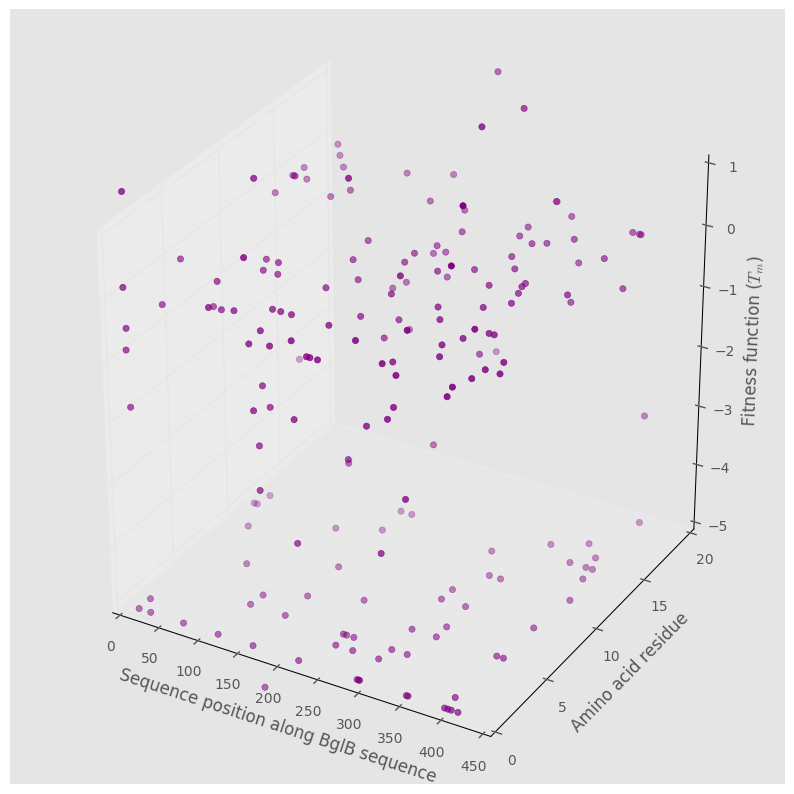

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
for ( thing, fmt_str, color, native_val ) in things: 
    data_3d = []
    for sp in df.sequence_pos.unique(): 
        my_muts = df[ ( df.sequence_pos == sp ) ].copy()
        my_muts[ 'my_name' ] = my_muts.index
        my_muts.set_index( 'designed', inplace=True )
        for L_index, L in enumerate( let ):
            x = L_index
            if my_muts.ix[ 0 ].my_name[ 0 ] == L:
                y = 0
            elif L in my_muts.index:
                y = my_muts.loc[ L ][ thing ]
                if np.isnan( y ):
                    y = -5
            else:
                y = np.nan             
            data_3d.append( [ x, y, sp ] )

    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    x_vals, y_vals, z_vals = zip( *data_3d )

    ax.set_xlabel( 'Sequence position along BglB sequence' )
    ax.set_xlim3d( 0, 450 )
    ax.set_ylabel( 'Amino acid residue' )
    ax.set_ylim3d( 0, 20 )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    ax.set_zlim3d( -5, 1 )
    ax.set_yticks( range( 20 ), let )
    ax.scatter( z_vals, x_vals, y_vals, color=color ) 
    fig.show()

In [12]:
print( df.columns )

Index(['sequence_pos', 'expression', 'tm', 'why_no_tm', 'kcat', 'km', 'kcatkm',
       'ki', 'eki', 'percent_err_kcat', 'err_kcat', 'percent_err_km', 'err_km',
       'err_kcatkm', 'in_plos_paper', 'gel_number', 'k', 'err_tm', 'err_k',
       'Siena gel levels', 'Alex gel levels', 'native', 'designed'],
      dtype='object')


/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


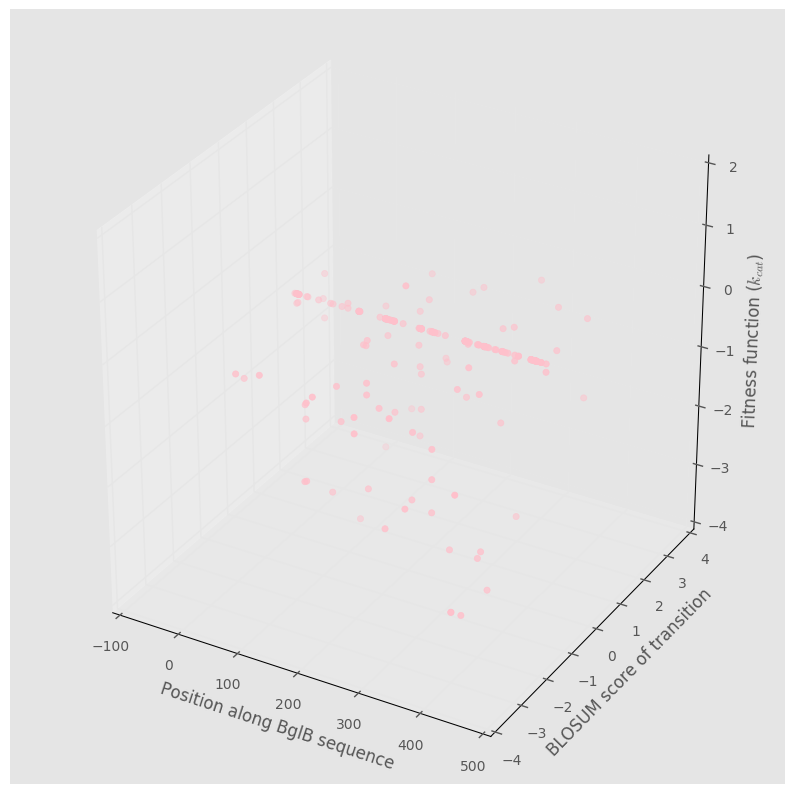

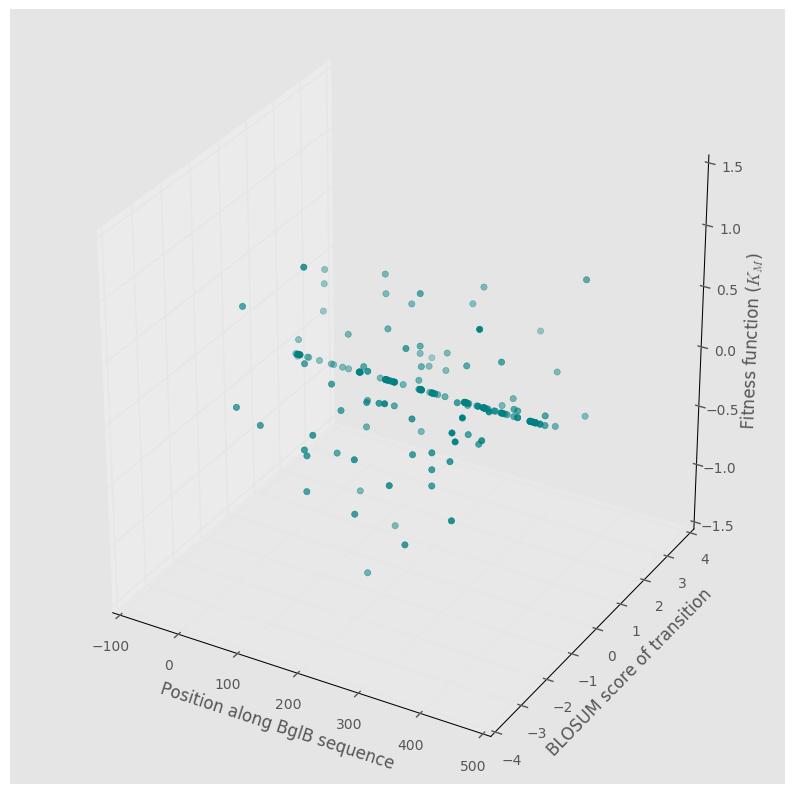

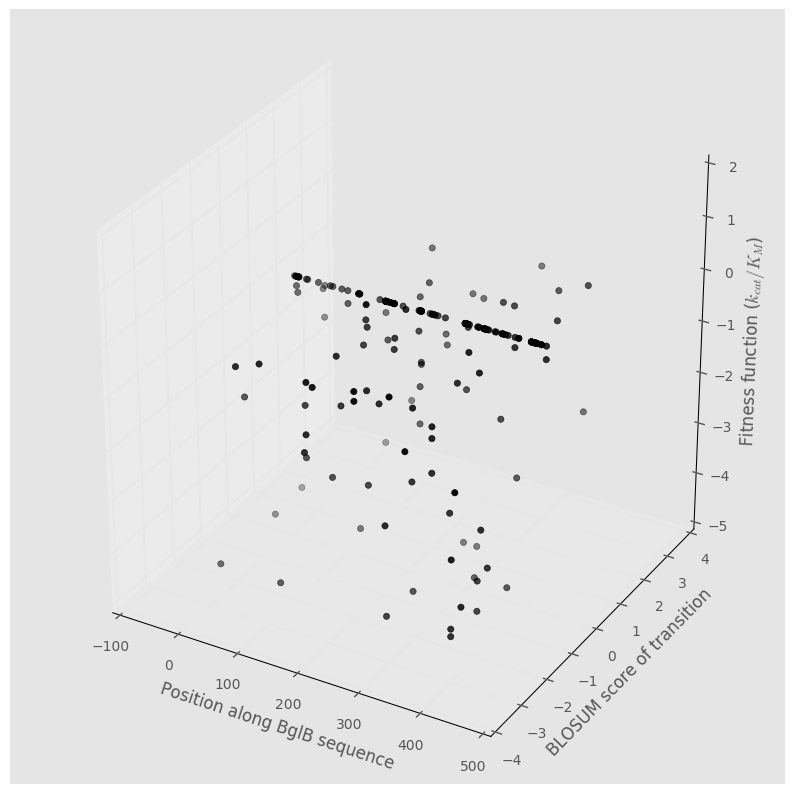

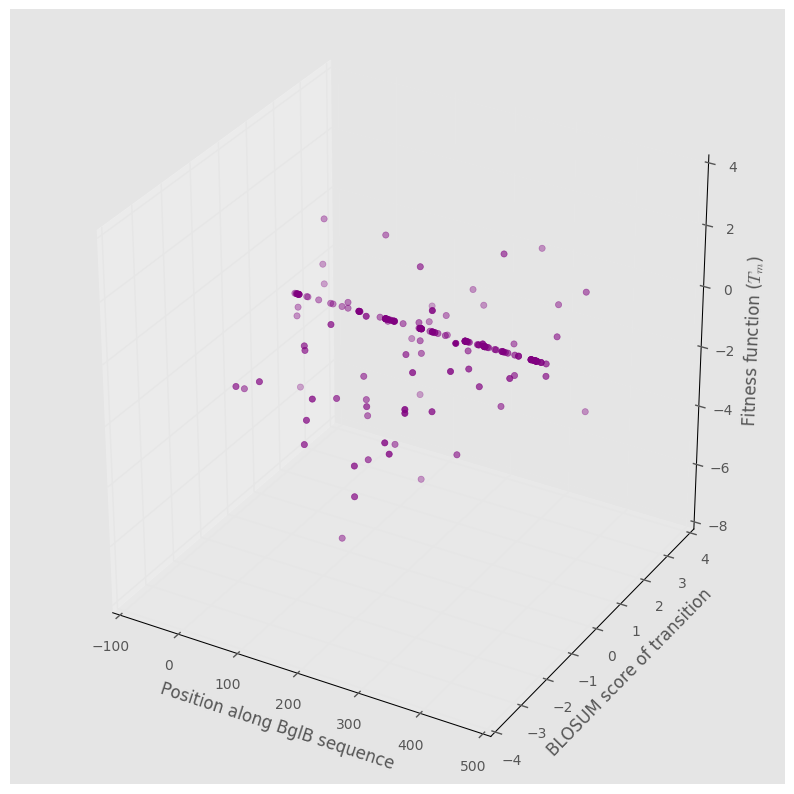

In [13]:
things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
for ( thing, fmt_str, color, native_val ) in things: 
    
    data_3d = []
    
    for idx, ser in df.iterrows():
        x = ser.sequence_pos
        y = blo.loc[ idx[0] ][ idx[ -1 ] ]
        z = ser[ thing ]
        my_tup = ( x, y, z )
        data_3d.append( my_tup )

    # native seq        
    for idx, ser in df.iterrows():
        x = ser.sequence_pos
        y = 0 
        z = 0 
        my_tup = ( x, y, z )
        data_3d.append( my_tup )
    
    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    #x_vals, y_vals, z_vals = zip( *data_3d )
    #ax.scatter( x_vals, y_vals, z_vals, color=color ) 
    ax.scatter( *zip(*data_3d), color=color ) 
    ax.set_xlabel( 'Position along BglB sequence' )
    ax.set_ylabel( 'BLOSUM score of transition' )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    fig.show()

In [14]:
# fuzzy cylinder 

In [17]:
# constrct a dict object of transitions in BglB data set 

things = [ 
    ( 'kcat', '$k_{cat}$', 'pink', 0 ), 
    ( 'km', '$K_M$', 'teal', 0 ), 
    ( 'kcatkm', '$k_{cat}/K_M$', 'k', 0 ), 
    ( 'tm', '$T_m$', 'purple', 0 ), 
]
    
maps = []
for ( thing, fmt_str, color, native_val ) in things: 
    my_mapping = {}
    for mutant_name, mutant_data in df.iterrows():
        tup = (  mutant_name[0], mutant_name[-1] )
        delta = mutant_data.kcat
        if tup in my_mapping:
            my_dict = { tup: np.mean( [ my_mapping[ tup ], delta ] ) }
            my_mapping.update( my_dict )
        else:
            my_mapping.update( { tup: delta } )
    #print thing 
    #print my_mapping
    maps.append( my_mapping )

In [18]:
# which is most similar 

my_results = {}
for matrix in avail:
    blosum_matrix = getattr( MatrixInfo, matrix ) # matrix as dict 
    differences = [] # empty list 

    fitness_function = maps[ 0 ] #kcat 
    for key, value in fitness_function.iteritems():
        
        if np.isnan( value ):
            continue 
        
        if not key in blosum_matrix:
            key = key[::-1] #reverse 
            
        if not key in blosum_matrix:
            continue # still not in there 
            
        corr_value = blosum_matrix[ key ]
        
        differences.append( np.abs( value - corr_value ) )
        
    my_results.update({ matrix: np.mean(differences) })
    
my_results

NameError: name 'avail' is not defined

/usr/local/bin/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


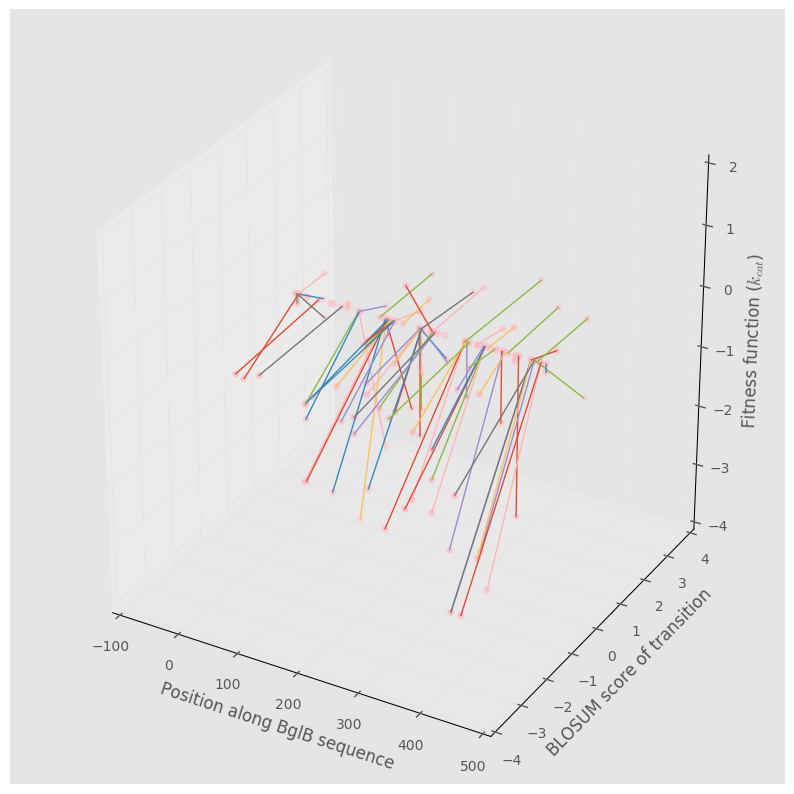

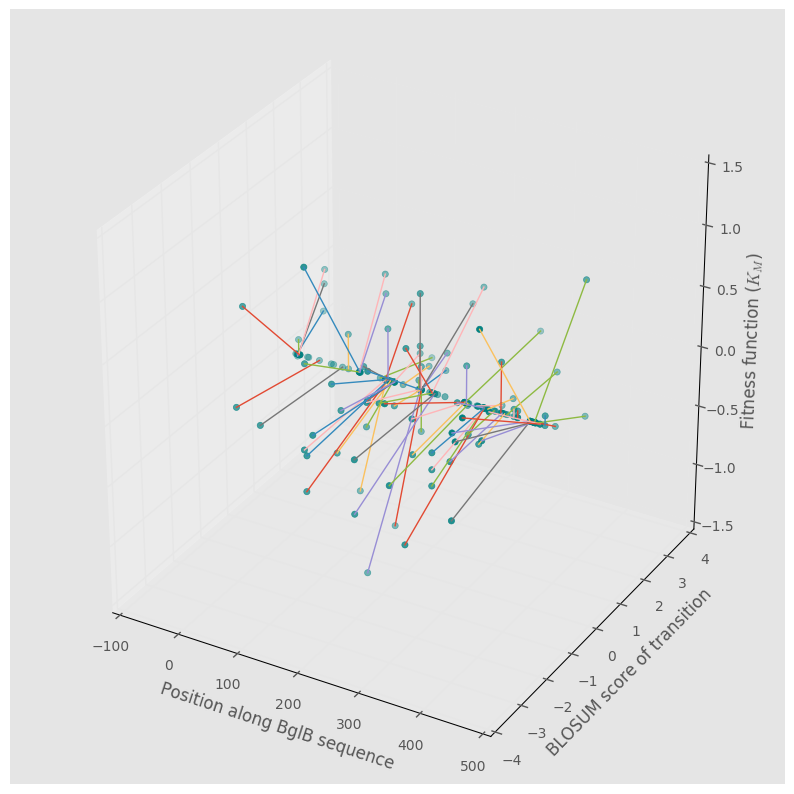

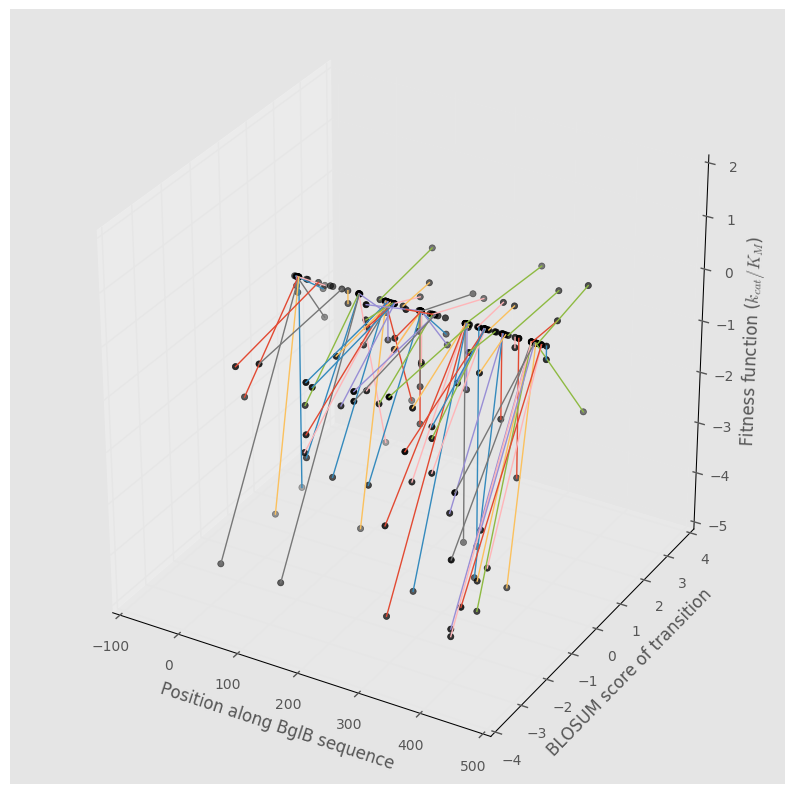

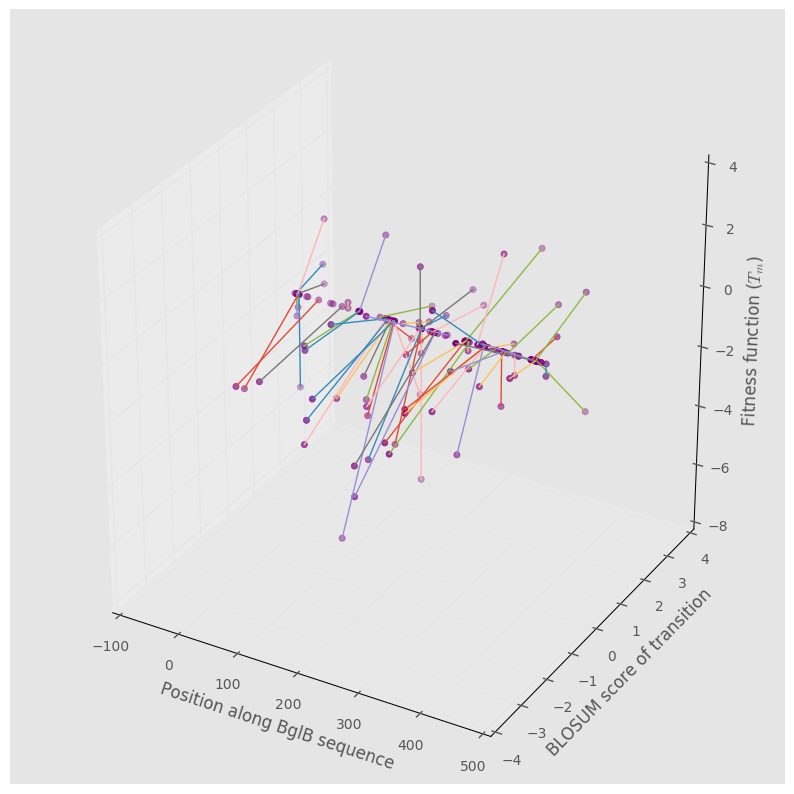

In [19]:
# radials 

for ( thing, fmt_str, color, native_val ) in things: 
    
    data_3d = []
    
    for idx, ser in df.iterrows():
        x = ser.sequence_pos
        y = blo.loc[ idx[0] ][ idx[ -1 ] ]
        z = ser[ thing ]
        my_tup = ( x, y, z )
        data_3d.append( my_tup )

    # native seq        
    for idx, ser in df.iterrows():
        x = ser.sequence_pos
        y = 0 
        z = 0 
        my_tup = ( x, y, z )
        data_3d.append( my_tup )
    
    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter( *zip(*data_3d), color=color ) 
    ax.set_xlabel( 'Position along BglB sequence' )
    ax.set_ylabel( 'BLOSUM score of transition' )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    
    # radials 
    for idx, ser in df.iterrows():
        blo_score = blo.loc[ idx[0] ][ idx[ -1 ] ]
        ff_score = ser[ thing ]
        ax.plot3D( ( ser.sequence_pos, ser.sequence_pos ), ( 0, blo_score ), ( 0, ff_score ) )
    fig.show()

In [ ]:
# what would a random one look like? 

# radials 

for ( thing, fmt_str, color, native_val ) in things: 
    
    data_3d = []
    
    for idx, ser in df.iterrows():
        x = ser.sequence_pos                # keep seq pos
        y = blo.loc[ idx[0] ][ idx[ -1 ] ]  # randomize the designed amino acid  
        z = ser[ thing ]                    # randomize 
        my_tup = ( x, y, z )
        data_3d.append( my_tup )

    # native seq        
    for idx, ser in df.iterrows():
        x = ser.sequence_pos
        y = 0 
        z = 0 
        my_tup = ( x, y, z )
        data_3d.append( my_tup )
    
    fig = plt.figure( figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter( *zip(*data_3d), color=color ) 
    ax.set_xlabel( 'Position along BglB sequence' )
    ax.set_ylabel( 'BLOSUM score of transition' )
    ax.set_zlabel( 'Fitness function ({})'.format( fmt_str ) )
    
    # radials 
    for idx, ser in df.iterrows():
        blo_score = blo.loc[ idx[0] ][ idx[ -1 ] ]
        ff_score = ser[ thing ]
        ax.plot3D( ( ser.sequence_pos, ser.sequence_pos ), ( 0, blo_score ), ( 0, ff_score ) )
    fig.show()